## Analysis 4: Flight Delay Prediction

Often times at airports, there are unexected departing flight delays which can cause stress and economical or environmental impacts. The purpose of this project is to design a machine learning model to assist in predicting the amount of time for departing flight delays.

There are three portions to this analysis: 
1. Multiple Linear Regression: explores feature selection, model selection
2. Polynomial Regression: selecting optimal degree
3. Compare ARR_DELAY vs DEP_DELAY linear and polynomial models

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [3]:
# read data and check the data with info()
plane_df = pd.read_csv('2018.csv')
plane_df.head()

,FL_DATE,OP_CARRIER,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 27
0,2018-01-01,UA,2429,EWR,DEN,1517,1512.0,-5.0,15.0,1527.0,...,268.0,250.0,225.0,1605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,UA,2427,LAS,SFO,1115,1107.0,-8.0,11.0,1118.0,...,99.0,83.0,65.0,414.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,UA,2426,SNA,DEN,1335,1330.0,-5.0,15.0,1345.0,...,134.0,126.0,106.0,846.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,UA,2425,RSW,ORD,1546,1552.0,6.0,19.0,1611.0,...,190.0,182.0,157.0,1120.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,UA,2424,ORD,ALB,630,650.0,20.0,13.0,703.0,...,112.0,106.0,83.0,723.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#determine columns with missing values
sum_missing_values = plane_df.isna().sum()
print(sum_missing_values)

FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0
DEP_TIME                112317
DEP_DELAY               117234
TAXI_OUT                115830
WHEELS_OFF              115829
WHEELS_ON               119246
TAXI_IN                 119246
CRS_ARR_TIME                 0
ARR_TIME                119245
ARR_DELAY               137040
CANCELLED                    0
CANCELLATION_CODE      7096862
DIVERTED                     0
CRS_ELAPSED_TIME            10
ACTUAL_ELAPSED_TIME     134442
AIR_TIME                134442
DISTANCE                     0
CARRIER_DELAY          5860736
WEATHER_DELAY          5860736
NAS_DELAY              5860736
SECURITY_DELAY         5860736
LATE_AIRCRAFT_DELAY    5860736
Unnamed: 27            7213446
dtype: int64


In [5]:
#DO NOT RUN THIS LINE EVER!
plane_df = plane_df.drop(columns=['Unnamed: 27'])

In [6]:
plane_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7213446 entries, 0 to 7213445
Data columns (total 27 columns):
 #   Column               Dtype  
---  ------               -----  
 0   FL_DATE              object 
 1   OP_CARRIER           object 
 2   OP_CARRIER_FL_NUM    int64  
 3   ORIGIN               object 
 4   DEST                 object 
 5   CRS_DEP_TIME         int64  
 6   DEP_TIME             float64
 7   DEP_DELAY            float64
 8   TAXI_OUT             float64
 9   WHEELS_OFF           float64
 10  WHEELS_ON            float64
 11  TAXI_IN              float64
 12  CRS_ARR_TIME         int64  
 13  ARR_TIME             float64
 14  ARR_DELAY            float64
 15  CANCELLED            float64
 16  CANCELLATION_CODE    object 
 17  DIVERTED             float64
 18  CRS_ELAPSED_TIME     float64
 19  ACTUAL_ELAPSED_TIME  float64
 20  AIR_TIME             float64
 21  DISTANCE             float64
 22  CARRIER_DELAY        float64
 23  WEATHER_DELAY        float64
 24

In [7]:
plane_df['CANCELLATION_CODE'].fillna('E', inplace=True) #E means plane isn't cancelled
plane_df['CANCELLATION_CODE'].unique()

array(['E', 'B', 'A', 'C', 'D'], dtype=object)

In [8]:
'''
FL_DATE                      0
OP_CARRIER                   0
OP_CARRIER_FL_NUM            0
ORIGIN                       0
DEST                         0
CRS_DEP_TIME                 0 time (int)
DEP_TIME                112317 time (decimal)
DEP_DELAY               117234 duration -> 0
TAXI_OUT                115830 duration -> 0
WHEELS_OFF              115829 time (decimal)
WHEELS_ON               119246 time (decimal)
TAXI_IN                 119246 duration -> 0
CRS_ARR_TIME                 0 time (int)
ARR_TIME                119245 time (decimal)
ARR_DELAY               137040 duration -> 0
CANCELLED                    0
CANCELLATION_CODE            0
DIVERTED                     0
CRS_ELAPSED_TIME            10 duration -> 0
ACTUAL_ELAPSED_TIME     134442 duration -> 0
AIR_TIME                134442 duration -> 0
DISTANCE                     0 
CARRIER_DELAY          5860736 duration -> 0
WEATHER_DELAY          5860736 duration -> 0
NAS_DELAY              5860736 duration -> 0
SECURITY_DELAY         5860736 duration -> 0
LATE_AIRCRAFT_DELAY    5860736 duration -> 0

time columns: ['DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']

duration columns: ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
'''

"\nFL_DATE                      0\nOP_CARRIER                   0\nOP_CARRIER_FL_NUM            0\nORIGIN                       0\nDEST                         0\nCRS_DEP_TIME                 0 time (int)\nDEP_TIME                112317 time (decimal)\nDEP_DELAY               117234 duration -> 0\nTAXI_OUT                115830 duration -> 0\nWHEELS_OFF              115829 time (decimal)\nWHEELS_ON               119246 time (decimal)\nTAXI_IN                 119246 duration -> 0\nCRS_ARR_TIME                 0 time (int)\nARR_TIME                119245 time (decimal)\nARR_DELAY               137040 duration -> 0\nCANCELLED                    0\nCANCELLATION_CODE            0\nDIVERTED                     0\nCRS_ELAPSED_TIME            10 duration -> 0\nACTUAL_ELAPSED_TIME     134442 duration -> 0\nAIR_TIME                134442 duration -> 0\nDISTANCE                     0 \nCARRIER_DELAY          5860736 duration -> 0\nWEATHER_DELAY          5860736 duration -> 0\nNAS_DELAY           

In [9]:
#replace missing duration values with 0
missing_duration_cols = ['DEP_DELAY', 'TAXI_OUT', 'TAXI_IN', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']

for col in missing_duration_cols:
    plane_df[col].fillna(0, inplace=True)

In [10]:
check_duration_na_fix = plane_df.isna().sum()
print(check_duration_na_fix)

FL_DATE                     0
OP_CARRIER                  0
OP_CARRIER_FL_NUM           0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
DEP_TIME               112317
DEP_DELAY                   0
TAXI_OUT                    0
WHEELS_OFF             115829
WHEELS_ON              119246
TAXI_IN                     0
CRS_ARR_TIME                0
ARR_TIME               119245
ARR_DELAY                   0
CANCELLED                   0
CANCELLATION_CODE           0
DIVERTED                    0
CRS_ELAPSED_TIME            0
ACTUAL_ELAPSED_TIME         0
AIR_TIME                    0
DISTANCE                    0
CARRIER_DELAY               0
WEATHER_DELAY               0
NAS_DELAY                   0
SECURITY_DELAY              0
LATE_AIRCRAFT_DELAY         0
dtype: int64


In [11]:
time_columns = ['DEP_TIME', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME']

for col in time_columns:
        plane_df[col].fillna(0, inplace=True)

## Multiple Linear Regression Prediciting DEP_DELAY

/var/folders/0q/wgx2cs755472fdwvfvs4d2c00000gn/T/ipykernel_34434/1992129793.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = plane_df.corr()


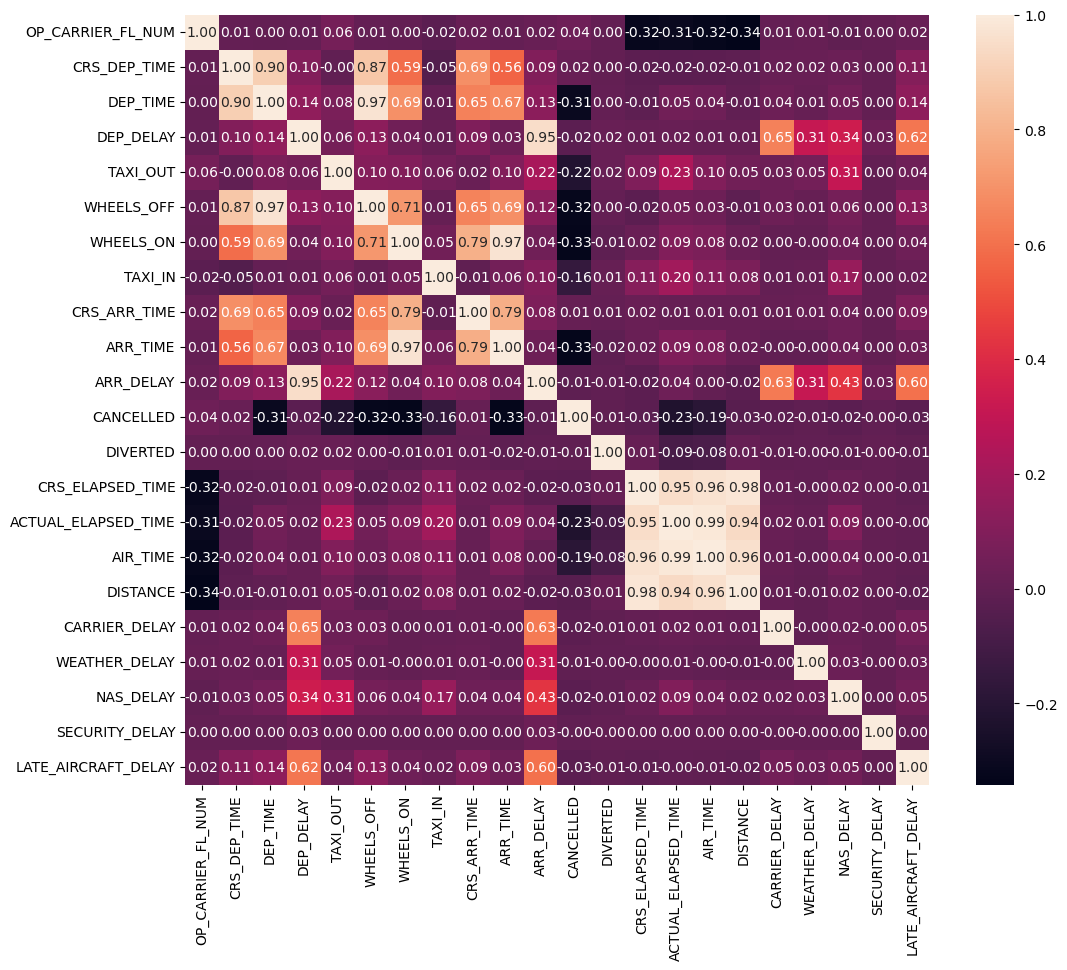

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation matrix
corr_matrix = plane_df.corr()

#plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

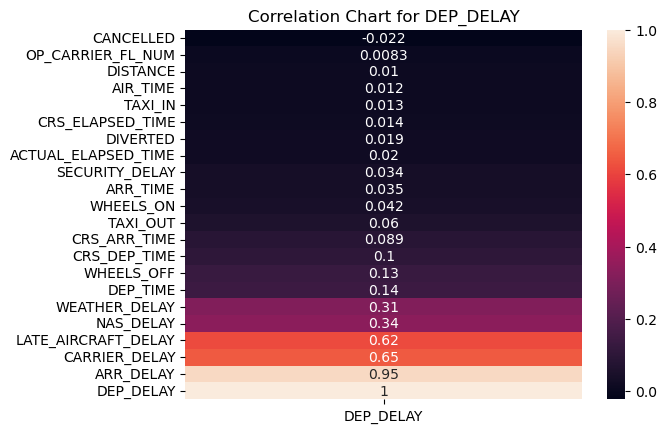

In [13]:
#1. feature selection
#to select features that have the most significnace on ARR_DELAY, for optimal multiple linear regression model

arr_delay_correlation = plane_df.select_dtypes(include=[np.number]).corr()
correlation_arr_delay = arr_delay_correlation[['DEP_DELAY']].sort_values(by='DEP_DELAY')

sns.heatmap(correlation_arr_delay, annot=True)
plt.title("Correlation Chart for DEP_DELAY")
plt.show()

A 30% correlation threshold is chosen based on the belief that correlations below this threshold are not 
sufficiently strong to be meaningful or actionable in the context of this model. Therefore, I'm considering only correlations of 30% or higher of a meaningful relationship between variables.

In [14]:
#array of features above indicated threshold in dataframe
threshold_cols=['DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY']

#updating dataframe to only contain the features needed for this analysis
plane_df=plane_df[threshold_cols]
plane_df

,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,LATE_AIRCRAFT_DELAY,NAS_DELAY,WEATHER_DELAY
0,-5.0,-23.0,0.0,0.0,0.0,0.0
1,-8.0,-24.0,0.0,0.0,0.0,0.0
2,-5.0,-13.0,0.0,0.0,0.0,0.0
3,6.0,-2.0,0.0,0.0,0.0,0.0
4,20.0,14.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
7213441,-4.0,-5.0,0.0,0.0,0.0,0.0
7213442,6.0,1.0,0.0,0.0,0.0,0.0
7213443,-5.0,11.0,0.0,0.0,0.0,0.0
7213444,23.0,14.0,0.0,0.0,0.0,0.0


In [15]:
#imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [16]:
#2. split the data and fit models

#using the train_test_split function, split the data into training and testing sets
#since ARR_DELAY is the column being predictied, drop from dataframe
y = plane_df['DEP_DELAY']
X = plane_df.drop(['DEP_DELAY'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=156)

In [17]:
#initialize arrays for performance evaluation
mae=[]
mse=[]
r2_arr=[]

The next five code blocks fit various linear regression models with increasing number of features starting with the most correlated feature and adding on the following features can show trend in performances. This is to show forward stepwise model selection within the 30% threshold.

In [18]:
#1 top feature

#fit model to linear regression
model_one = LinearRegression()
model_one = model_one.fit(X_train[['ARR_DELAY']], y_train)

print('Intercept: ',model_one.intercept_)
print('Coefficients: ',model_one.coef_)

#evaluate errors
preds_one = model_one.predict(X_test[['ARR_DELAY']])
print('MAE (test): ',metrics.mean_absolute_error(y_test,preds_one))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds_one))

mae.append(metrics.mean_absolute_error(y_test,preds_one))
mse.append(metrics.mean_squared_error(y_test,preds_one))

#evaluate r-squared
r2_one = r2_score(y_test, preds_one)
print('R-squared: ',r2_one)
r2_arr.append(r2_one)

Intercept:  5.30189052772238
Coefficients:  [0.9101618]
MAE (test):  9.007054366322333
MSE (test):  184.70861961558913
R-squared:  0.9071409800128981


In [19]:
#2 top features
model_two = LinearRegression()
model_two = model_two.fit(X_train[['ARR_DELAY', 'CARRIER_DELAY']], y_train)

print('Intercept: ',model_two.intercept_)
print('Coefficients: ',model_two.coef_)

preds_two = model_two.predict(X_test[['ARR_DELAY', 'CARRIER_DELAY']])
print('MAE (test): ',metrics.mean_absolute_error(y_test,preds_two))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds_two))

mae.append(metrics.mean_absolute_error(y_test,preds_two))
mse.append(metrics.mean_squared_error(y_test,preds_two))

r2_two = r2_score(y_test, preds_two)
print('R-squared: ',r2_two)
r2_arr.append(r2_two)

Intercept:  5.035482728497119
Coefficients:  [0.85948602 0.14201136]
MAE (test):  8.709634455876278
MSE (test):  175.8165865461415
R-squared:  0.9116112937331795


In [20]:
#3 top features
model_three = LinearRegression()
model_three = model_three.fit(X_train[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY']], y_train)

print('Intercept: ',model_three.intercept_)
print('Coefficients: ',model_three.coef_)

preds_three = model_three.predict(X_test[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY']])
print('MAE (test): ',metrics.mean_absolute_error(y_test,preds_three))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds_three))

mae.append(metrics.mean_absolute_error(y_test,preds_three))
mse.append(metrics.mean_squared_error(y_test,preds_three))

r2_three = r2_score(y_test, preds_three)
print('R-squared: ',r2_three)
r2_arr.append(r2_three)

Intercept:  3.7972467920269954
Coefficients:  [0.71886863 0.28188309 0.29608424]
MAE (test):  7.670246985648389
MSE (test):  152.47299437609925
R-squared:  0.9233468754098765


In [21]:
#4 top features
model_four = LinearRegression()
model_four = model_four.fit(X_train[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY']], y_train)

print('Intercept: ',model_four.intercept_)
print('Coefficients: ',model_four.coef_)

preds_four = model_four.predict(X_test[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY']])
print('MAE (test): ',metrics.mean_absolute_error(y_test,preds_four))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds_four))

mae.append(metrics.mean_absolute_error(y_test,preds_four))
mse.append(metrics.mean_squared_error(y_test,preds_four))

r2_four = r2_score(y_test, preds_four)
print('R-squared: ',r2_four)
r2_arr.append(r2_four)

Intercept:  3.7079956657924615
Coefficients:  [0.70979056 0.29116207 0.30554135 0.01839849]
MAE (test):  7.640934105374823
MSE (test):  152.50309165964862
R-squared:  0.9233317445282724


In [22]:
#all 30% threshold features
model_threshold = LinearRegression()
model_threshold = model_threshold.fit(X_train[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY']], y_train)

print('Intercept: ',model_threshold.intercept_)
print('Coefficients: ',model_threshold.coef_)

preds_threshold = model_threshold.predict(X_test[['ARR_DELAY', 'CARRIER_DELAY', 'LATE_AIRCRAFT_DELAY', 'NAS_DELAY', 'WEATHER_DELAY']])
print('MAE (test): ',metrics.mean_absolute_error(y_test,preds_threshold))
print('MSE (test): ',metrics.mean_squared_error(y_test,preds_threshold))

mae.append(metrics.mean_absolute_error(y_test,preds_threshold))
mse.append(metrics.mean_squared_error(y_test,preds_threshold))

r2_threshold = r2_score(y_test, preds_threshold)
print('R-squared: ',r2_threshold)
r2_arr.append(r2_threshold)

Intercept:  0.33570993442801367
Coefficients:  [0.29563696 0.72000461 0.73893082 0.45672943 0.6870467 ]
MAE (test):  6.291321690327591
MSE (test):  121.92668517688037
R-squared:  0.9387034967866467


In [23]:
#3. performance evaluation

#put arrays in a dataframe
data={
    'Features': range(1, 6),
    'MAE':mae,
    'MSE':mse,
    'R2':r2_arr
}

evaluation_df=pd.DataFrame(data)
evaluation_df

,Features,MAE,MSE,R2
0,1,9.007054,184.708620,0.907141
1,2,8.709634,175.816587,0.911611
2,3,7.670247,152.472994,0.923347
3,4,7.640934,152.503092,0.923332
4,5,6.291322,121.926685,0.938703


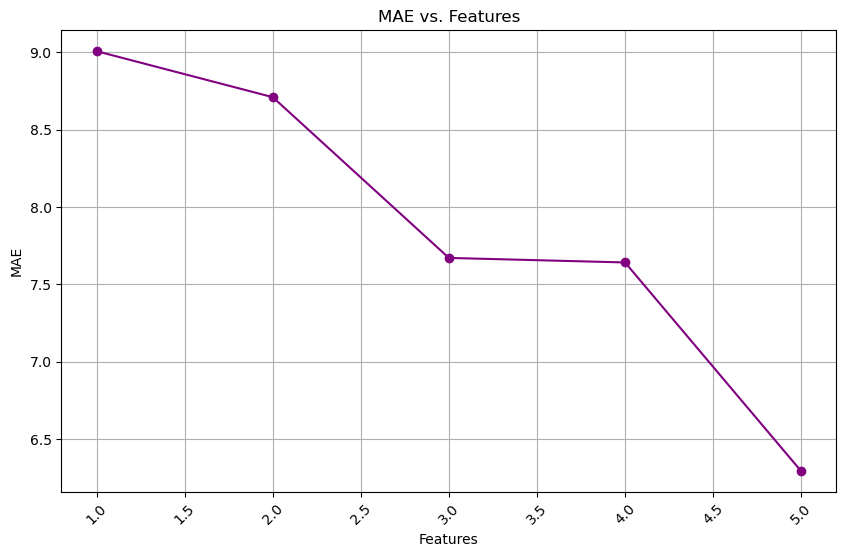

In [24]:
#plot mean average error as number of features as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(evaluation_df['Features'], evaluation_df['MAE'], marker='o', color='purple')
plt.title('MAE vs. Features')
plt.xlabel('Features')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

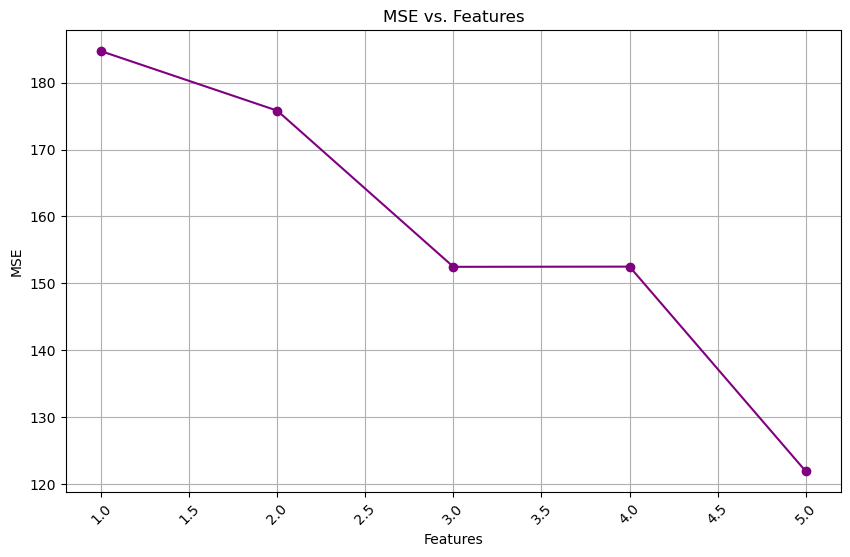

In [25]:
#plot mean squared error as number of features as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(evaluation_df['Features'], evaluation_df['MSE'], marker='o', color='purple')
plt.title('MSE vs. Features')
plt.xlabel('Features')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

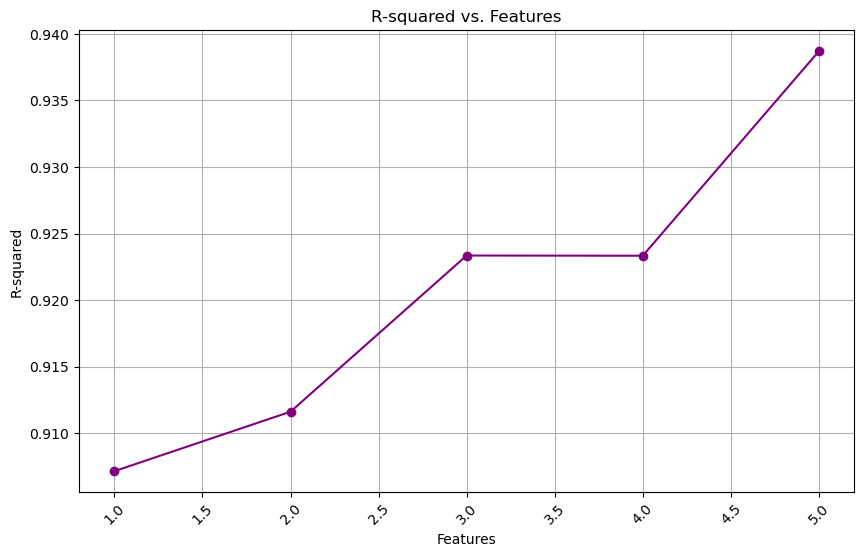

In [26]:
#plot r-squared as number of features as the x-axis
plt.figure(figsize=(10, 6))
plt.plot(evaluation_df['Features'], evaluation_df['R2'], marker='o', color='purple')
plt.title('R-squared vs. Features')
plt.xlabel('Features')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

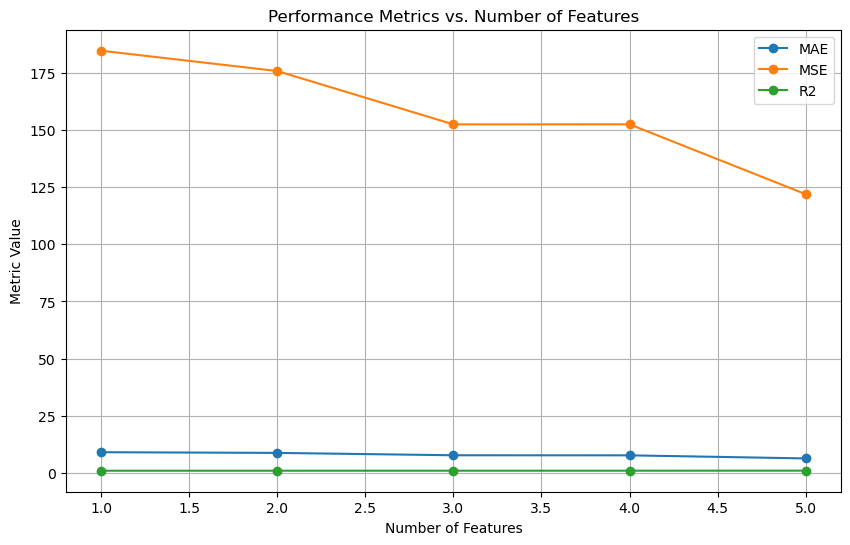

In [27]:
plt.figure(figsize=(10, 6))

# Plot MAE
plt.plot(data['Features'], data['MAE'], marker='o', label='MAE')

# Plot MSE
plt.plot(data['Features'], data['MSE'], marker='o', label='MSE')

# Plot R2
plt.plot(data['Features'], data['R2'], marker='o', label='R2')

# Add labels and title
plt.xlabel('Number of Features')
plt.ylabel('Metric Value')
plt.title('Performance Metrics vs. Number of Features')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

Given these graphs, it shows that as number of features increases, MAE and MSE decreases and r-squared increases. R-squared increases as number of features increases, because it can capture the variability in DEP_DELAY. With more features, the indicated proportion of the variance of that can be explained by our model prediction increases. MAE and MSE decreases as the model flexibility increases, which means the model generalizes well to the test set. The higher complexity model captures more of the underlying patterns in the data, resulting in smaller discrepancies between the predicted and actual values.

Therefore, after the feature selection using a 30% threshold, model selection, and the performance analysis, the optimal model contains the top 5 most correlated features.

## Polynomial Regression Predicting DEP_DELAY

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#1. select best feature

#initiate the SelectKBest model
model_fr = SelectKBest(score_func=f_regression, k=1)

#fit the model to all data
plane = model_fr.fit(X, y)

#identify selection feature
plane.get_feature_names_out()

array(['ARR_DELAY'], dtype=object)

In [29]:
#2. loop to increment the degree of a polynomial regression to identify optimal degree for ARR_DELAY vs DEP_DELAY

from sklearn.preprocessing import PolynomialFeatures

MSEs = []
MAEs = []
for i in range(1, 13):
    #fit polynomial regression model
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_trn = poly.fit_transform(X_train['ARR_DELAY'].values.reshape(-1, 1))
    
    #fit model
    lm = LinearRegression()
    lm.fit(x_trn, y_train)
    
    #transform test data using the same polynomial features
    x_tst = poly.transform(X_test['ARR_DELAY'].values.reshape(-1, 1))
    
    #predict
    preds = lm.predict(x_tst)
    
    #evaluate performance
    mse = metrics.mean_squared_error(y_test, preds)
    mae=metrics.mean_absolute_error(y_test,preds)
    MSEs.append(mse)
    MAEs.append(mae)
    print('Degree:', i, 'MSE (test):', mse, 'MAE (test): ',mae)

Degree: 1 MSE (test): 184.70861961558913 MAE (test):  9.007054366322333
Degree: 2 MSE (test): 171.70935481075173 MAE (test):  8.665631516353523
Degree: 3 MSE (test): 162.2387756125494 MAE (test):  8.369350469263987
Degree: 4 MSE (test): 154.2529259203496 MAE (test):  7.993325382685064
Degree: 5 MSE (test): 146.67594159828403 MAE (test):  7.642200614374234
Degree: 6 MSE (test): 263.43403563655386 MAE (test):  10.780106912695551
Degree: 7 MSE (test): 577.1789940417855 MAE (test):  14.926235043892232
Degree: 8 MSE (test): 961.6199374314297 MAE (test):  18.034667555545276
Degree: 9 MSE (test): 1442.869359867355 MAE (test):  19.880014676076776
Degree: 10 MSE (test): 1546.2246153177143 MAE (test):  20.091437966128197
Degree: 11 MSE (test): 1641.5507398898378 MAE (test):  20.242944682430494
Degree: 12 MSE (test): 1724.832426031889 MAE (test):  20.35652301738841


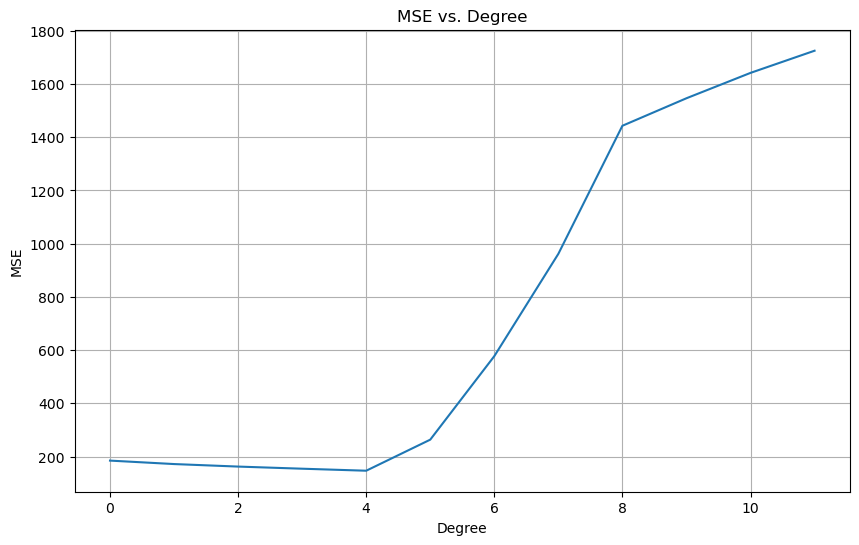

In [38]:
#3. identify optimal degree

plt.figure(figsize=(10, 6))
plt.plot(MSEs)
plt.title('MSE vs. Degree')
plt.xlabel('Degree')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

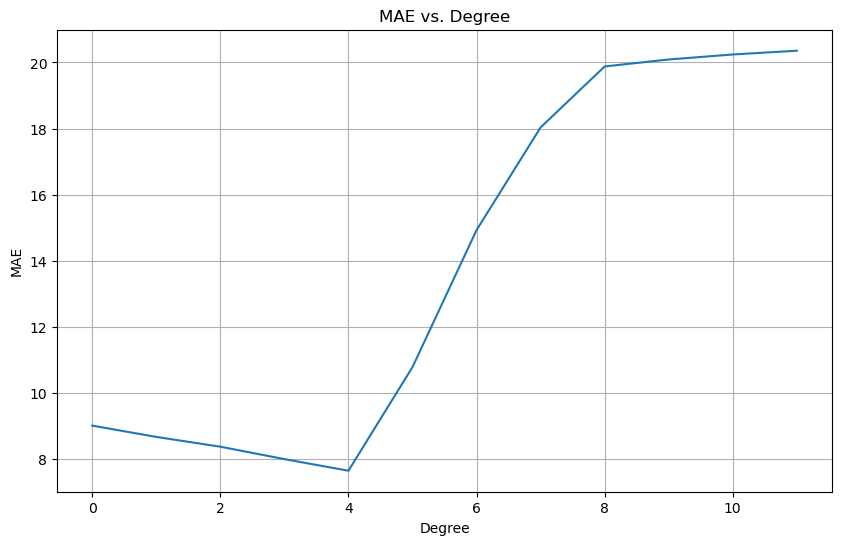

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(MAEs)
plt.title('MAE vs. Degree')
plt.xlabel('Degree')
plt.ylabel('MAE')
plt.grid(True)
plt.show()

The optimal degree of 4 represents a balance between bias and variance. The model has complexity to capture the patterns in the data without overfitting. After degree of 4, the models become increasingly flexible, leading to significantly increasing errors. Therefore, by selecting the minimum number of features based on the graph is optimal.

In [32]:
#degree of 4 polynomial regression
poly = PolynomialFeatures(degree=4, include_bias=False)
x_trn = poly.fit_transform(X_train['ARR_DELAY'].values.reshape(-1, 1))
    
# Fit the model
lm = LinearRegression()
lm.fit(x_trn, y_train)
    
# Transform test data using the same polynomial features
x_tst = poly.transform(X_test['ARR_DELAY'].values.reshape(-1, 1))
    
# Predict on test set
preds_poly = lm.predict(x_tst)
    
# Calculate performance
mae=metrics.mean_absolute_error(y_test,preds_poly)
mse = metrics.mean_squared_error(y_test, preds_poly)
r2=r2_score(y_test, preds_poly)
print('MAE (test): ',mae, '\nMSE (test): ',mse, '\nR-squared: ',r2)

MAE (test):  7.993325382685064 
MSE (test):  154.2529259203496 
R-squared:  0.9224520460338181


Based on this performance evaluation for polynomial regression of degree 4, the MAE and MSE are the minimum from all other degrees, shown in the graphs above. The R-squared value is 0.922 which indicates that the proportion of the variation in the dependent variable that is predictable from the independent variable. 

## Comparison

Taking the linear regression for ARR_DELAY and DEP_DELAY from the first section, is shows that MAE (test) is 9.01, MSE (test) is 184.71, and R-squared is 0.91 approximately. 

The polynomial regression for ARR_DELAY and DEP_DELAY shows MAE (test) is 8.00, MSE (test) is 154.25, and R-squared is 0.92 approximately. 

Therefore, comparing these one-to-one regression, we can conclude based on the performance evaluation that the polynomial regression slightly fits the model better than linear regression.